### 统计学：检验心理学现象

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。**每位参与者**必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量是文字与颜色是否一致，因变量是每位参与者在每种条件下全部完成任务使用的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

$\mu_{congruent}$:总体在文字与颜色一致条件下使用的平均时间

$\mu_{incongruent}$:总体在文字与颜色不一致条件下使用的平均时间

$$H_0 : \mu_{congruent} \geq \mu_{incongruent}$$
$$H_1 : \mu_{congruent} < \mu_{incongruent}$$

**零假设$H_0$** : 参与者在文字与颜色一致条件下完成任务使用的平均时间大于等于文字与颜色不一致条件下完成任务使用的平均时间。

**对立假设$H_1$** : 参与者在文字与颜色一致条件下完成任务使用的平均时间小于不一致条件下完成任务使用的平均时间，存在斯特鲁普效应，与颜色不一致的文字信息干扰了参与者，使参与者说出颜色的时间变长。

**我想执行假设检验来测试两次实验使用的平均时间是否存在差异。因为样本容量很小，所以使用自助法和抽样分布，构建参数的置信区间，通过模拟零假设和单尾检验法确定P值，然后与I 类错误阙值比较，从而判断是否拒绝零假设。使用置信区间和假设检验能够在做决策时提供统计显著性。**


(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
#加载数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.shape

(24, 2)

In [3]:
#参与者完成两次实验使用的时间的差值diff
diff = df.Incongruent - df.Congruent

In [4]:
#差值集的描述性统计结果
diff.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
dtype: float64

In [5]:
#计算方差和极差
np.var(diff), diff.max() - diff.min()

(22.680434998263895, 19.969000000000005)

`1.`集中趋势测量：

平均值$\bar{x}_{Incon-con} = 7.9648$

中位数$Median = 7.6665$

`2.`变异测量：

标准差$\sigma = 4.8648$

方差$\sigma^2 = 22.6804$

极差$max - min = 19.9690$


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Text(0, 0.5, 'Probability')

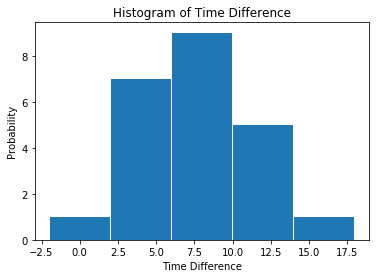

In [6]:
# 在这里创建可视化图表
plt.hist(diff, bins=range(-2,22,4), rwidth=0.98,align='mid');
plt.title('Histogram of Time Difference')
plt.xlabel('Time Difference')
plt.ylabel('Probability')

差值集的直方图近似正态分布，均值，中位数和众数都在（6，10）区间内。

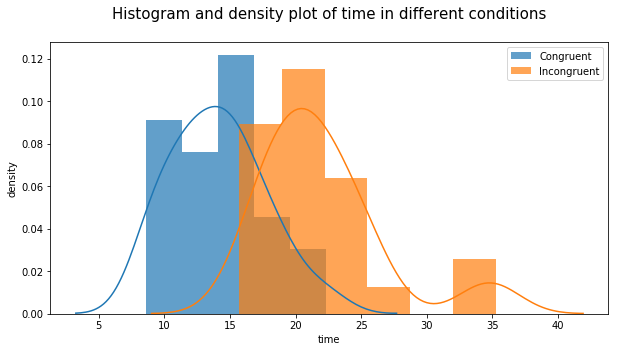

In [7]:
#观察在不同条件下的使用时间的分布差异
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.distplot(df.loc[:, "Congruent"], label= "Congruent", hist_kws={'alpha':.7})
ax = sns.distplot(df.loc[:, "Incongruent"], label= "Incongruent",hist_kws={'alpha':.7})
ax.set(xlabel='time', ylabel='density')
ax.set_title("Histogram and density plot of time in different conditions\n",  fontsize=15)
plt.legend()

从上图中可以看出，两组使用时间的分布存在差异，文字与颜色不一致条件下的使用时间的分布向右移动。看起来这种情况下的参与者比文字和颜色一致时完成任务使用的时间更多。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [10]:
# 在这里执行统计检验
#1. 
#使用自助法和放回取样，测试均数差diffs
diffs = []
for _ in range(10000):
    bootsamp = df.sample(100, replace = True)
    means_Incon = bootsamp['Incongruent'].mean()
    means_con = bootsamp['Congruent'].mean()
    diffs.append(means_Incon - means_con)

In [11]:
#2. 
#构建置信区间，置信度为99%
np.percentile(diffs, 0), np.percentile(diffs, 99)

(6.351849999999983, 9.1091032)

置信区间不包含0，这表明总体的均值之间是存在差异的，文字与颜色不一致条件下平均使用的时间大于一致条件下平均使用的时间，置信水平为99%。

In [12]:
#3.
#模拟零假设
null_vals = np.random.normal(0, np.std(diffs), 10000)

In [13]:
#4.
#计算P值
pval = (null_vals > diffs).mean()
pval

0.0

因为置信度为99%，I类错误的阙值为0.01，因为p=0<0.01，所以拒绝零假设。

结论：参与者在不同条件下完成任务使用的时间存在明显差异，在文字与颜色不一致条件下使用的时间明显大于一致条件下使用的时间，所以，存在斯特鲁普效应，试验结果与期望一致。

(6)所观察效应的原因是什么？所执行的 Stroop 任务的扩展或相关试验？这可能会得到类似的效应。

在阅读斯特鲁普效应相应的[维基百科](https://en.wikipedia.org/wiki/Stroop_effect)后，有几种理论用于解释Stroop效应，其中最常见的是处理速度理论，自动化理论，和选择性注意理论。我认为所观察效应的原因是大脑在识别颜色和阅读单词之间存在滞后，大脑通过习惯性阅读自动理解单词的意思，而识别颜色不是一个自动过程，所以犹豫不决，在文字与颜色不一致条件下识别文字信息干扰了参与者。

扩展或相关试验：将参与者执行的任务改为报告文字（单词），观察文字与颜色不一致条件下颜色信息是否会干扰到文字，对比一致条件和不一致条件下反应时间的差异。
还可以进行相关试验：要求参与者说出列表中不包含数字的字符串的长度，如“store”，"str"，记录反应时间。然后再说出同等大小的另一列表中由数字组成的字符串的长度，如“555”，“23”等，记录参与者在不同情况下全部完成任务使用的时间，测试数字对参与者识别字符串长度的干扰。